In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import random

import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")

palette = sns.color_palette()

# Week 3

## Empirical rule and Z-score

**Z-score**
How many standard deviations aways from mean a value is?

$$
zscore(x) = \frac{x - \mu}{\sigma}
$$

## CDF and PDF

> TODO

**How to plot distributions:**
```python
sns.distplot() # All variations of distribution plot
sns.histplot() # default - histogram
sns.kdeplot()  # kind='kde' - kernel density estimation (smooth line)
sns.ecdfplot() # kind='exdf' - empirical cumulative distribution function
sns.rugplot()  # different, show ticks for each data point
```

For multiple distributions use:
```python
sns.violinplot()
```

In [3]:
# Z-value computations
zscore_df = pd.DataFrame({"z": [i for i in range(-3, 4)]})
zscore_df["zscore"] = stats.norm.cdf(zscore_df["z"])
zscore_df["zscore_around_mean"] = stats.norm.cdf(zscore_df["z"]) - stats.norm.cdf(-zscore_df["z"])
zscore_df

,z,zscore,zscore_around_mean
0,-3,0.001350,-0.997300
1,-2,0.022750,-0.954500
2,-1,0.158655,-0.682689
3,0,0.500000,0.000000
4,1,0.841345,0.682689
5,2,0.977250,0.954500
6,3,0.998650,0.997300


RAW


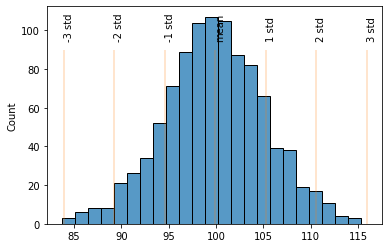

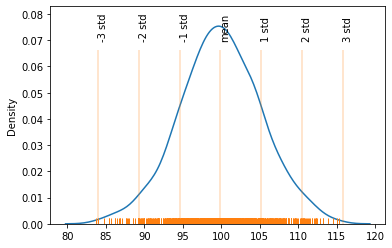

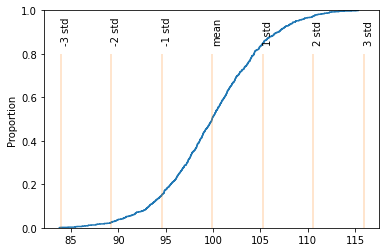

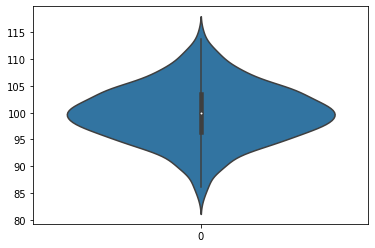

STANDARDIZED
99.91323168658556 5.325804749070625


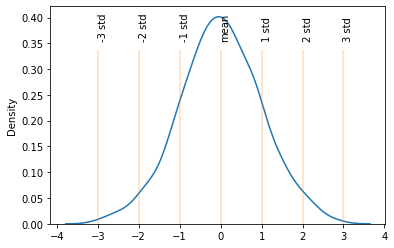

In [4]:
def standardize(x):
    mean = np.mean(x)
    std = np.std(x)
    print(mean, std)
    inner = lambda x: (x - mean) / std
    return inner(x)


def add_empirical_rule_annotations(ax, x):
    std = np.std(x)
    mean = np.mean(x)

    x_bound = [mean + i * std for i in range(-3, 4)]
    y_bound = ax.get_ylim()

    ax.vlines(x=x_bound, ymin=y_bound[0], ymax=y_bound[1] * 0.8, color=palette[1], lw=2, alpha=0.2)
    for idx, x in enumerate(x_bound):
        text = f"{idx - 3} std" if idx != 3 else "mean"
        ax.annotate(text=text, xy=(x, (y_bound[1] - y_bound[0]) * 0.85 + y_bound[0]), rotation=90)


n = 1000
mu, std = 100, 5

print("RAW")
measured = np.random.normal(mu, std, n)
ax = sns.histplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

# This is how to combine plots
ax = sns.kdeplot(data=measured)
ax = sns.rugplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

ax = sns.ecdfplot(data=measured)
add_empirical_rule_annotations(ax, measured)
plt.show()

ax = sns.violinplot(data=measured)
plt.show()

print("STANDARDIZED")
standardized = standardize(measured)
ax = sns.kdeplot(data=standardized)
add_empirical_rule_annotations(ax, standardized)
plt.show()

In [5]:
# Shorthand for z-scores
x = np.random.normal(0, 1, 5)
z = stats.zscore(x)
print(x)
print(z)

[ 0.96303321 -1.5463893   0.3908841  -0.88390681 -0.59555671]
[ 1.44185431 -1.34692712  0.80601129 -0.61069443 -0.29024405]


## Normal approximation



## Binomial setting and Normal approximation

**Example:**

What is the probability of it most $l$ successes from $n$ attempts.
This is $l$ binomial settings that we can not sum together since they are not mutually exclusive and we would have to use *PIE* - *Principle of Inclusion and Exclusion*.

Or we can approximate it, given that the binomial curve is similar to normal curve, something like $n>50$ and use normal approximation to determine this probability.

In [6]:
# TODO create binomial setting and compare number of draws to normal distribution

n = 50
k = 4
math.comb(n, k)

#np.random.binomial()

230300

## Population, Parameters, Statistics, Samples and Standard Errors

* population - all entities that we can draw a sample from
* parameter - property of population we want to estimate e.g. $\mu$, $\sigma$
* sample - draw from population
* statistics - value we estimate from a sample
* standard error $SE$ - of statistics tells us how far off statistics is from its expected value - *true* value of the parameter
    - $SE(x_n) = \frac{\sigma}{\sqrt(n)}$ -> *Squared root law* where $x_n$ bar is mean of sample of size $n$ from population ($\mu$, $\sigma$)
    - notice that we don't know $\sigma$ - population parameter thus we can't give precise $SE$
    - it is *not* affected by the size of the population itself just by the size of the sample
    - i.e. it gives us formula to get the sample size we want given the precision we want (assuming we know $\sigma$)

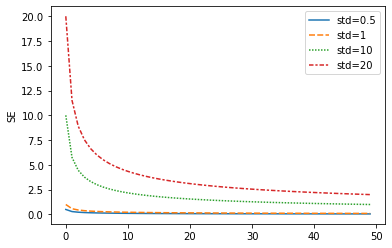

In [7]:
stds = [0.5, 1, 10, 20]
sample_size = np.linspace(1, 100)

df = pd.DataFrame({"sample_size": sample_size})
for std in stds:
    df[f"std={std}"] = std / np.sqrt(sample_size)

# TODO: Learn to pivot or use wide-dataframes
df["sample_size"] = df.sample_size.astype("category")
ax = sns.lineplot(data=df)

# Combine lineplots this way, but it doesn't show legend
# for std in stds:
#     ax = sns.lineplot(x="sample_size", y=f"std={std}", data=df, legend="")

ax.set(ylabel="SE")
plt.show()

## EV and SE of Sum, Percentages

**Sums**

If we are interested in sum of $n$ draws $S_n$ rather than the average $\bar{x_n}$?

$$
S_n = n * x_n
\\
E(S_n) = n * mu
\\
SE(S_n) = sqrt(n) * std
\\
$$

Careful that while with the increasing sample size $n$ the $SE(x_n)$ goes down the $SE(S_n)$ increases.


**Percentages**

*Question:* What percentage of likely voters approve of the way the US Presedent is handling his job?

Each voter either approves (labeled `1`) or not (labeled `0`). Then the answer is the sum of all the labels.

$S_n$ is the number of voters that approve.

$$
E(\text{percentage of 1s}) = \mu * 100\%
\\
SE(\text{percentage of 1s}) = \frac{\sigma}{\sqrt{n}} * 100\%
$$

These hold only for draw with replacement, however with small $\text{sample\_size} / \text{population\_size}$ it is alright.

**Expected Value and Standard Error**

Fox variable $x$ that has $k$ possible values - $x_1, x_2, ... x_k$

$$
E(\mu) = \frac{\sum_{i}[P(x_i) * x_i])}{n}
\\
E(sum) = n * \mu
$$

And its Standard Error

$$
\sigma^2 = \sum_{i=1}^n (x_i - x_n)^2 * P(x_i)
\\
SE(sum) = \sqrt{n} * \sigma
$$


## Three types of histograms

1. Probability histogram
2. Sample histogram / Empirical histogram of real data
3. Probability histogram of statistics e.g. $S_{100} = \text{number of tails in 100 throws}$

## Law of Large numbers

> The square root law says that $SE(x_n)$, the standard error of the sample mean, goes to zero as the sample size increases.
> Therefore the $x_n$ will be close to its expected value $\mu$ if the sample size is large.

It applies to averages and therefore also percentages but not for sums as their SE increases.
This has to be sampling with replacement.

## Central Limit Theorem

> When sampling with replacement and $n$ is *large*, then the sampling distribution of the sample sum (or average or percentage) approximately follows the normal curve.

* statistics has to be sum, however averages and percentages are also sums so we can use CLT.
* thus for random variable $X$ representing some statistics we can use normal approximation - to standardize $z_i = \frac{x_i - E(X)}{SE(X)}$
* the more skewed the population distribution is the bigger sample size $n$ we need

# Week 4 - predictions, regression

## Correlation coefficient

$$
r = \frac{1}{n} * \sum_{i=1}^{n} \frac{x_i - x_n}{\sigma_x} * \frac{y_i - y_n}{\sigma_y}
  = \frac{1}{n} * \sum_{i=1}^n zscore(x_i) * zscore(y_i)
$$

If both $x$ and $y$ are above/below their respective mean correlation coefficient is positive otherwise it is negative.

5.0 2.9450754468697578
32.97843856003721 32.49557596347864
r = 0.92
corrcoef = 0.92


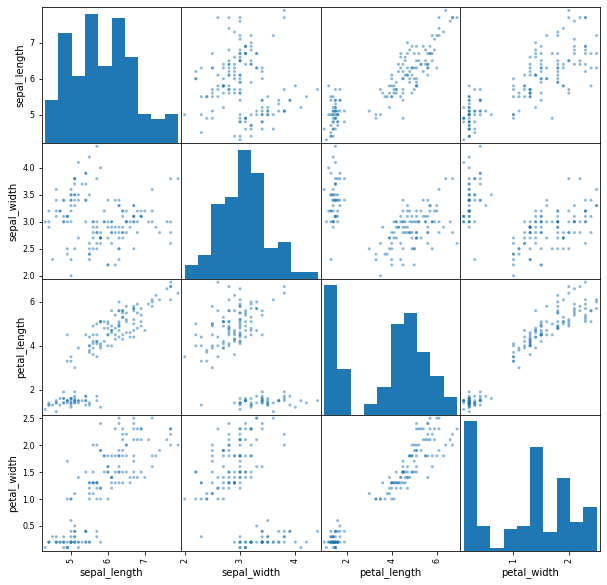

In [8]:
def correlattion_coefficient(x, y):
    return sum(standardize(x) * standardize(y)) / n

n = 50
x = np.linspace(0, 10, n)
y = x**2 + np.random.uniform(-20, 20, n)

print(f"r = {correlattion_coefficient(x, y):.2f}")
print(f"corrcoef = {np.corrcoef(x, y)[0,1]:.2f}")

from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, figsize=(10, 10))
plt.show()


<AxesSubplot:>

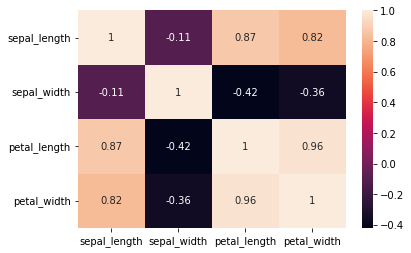

In [9]:
# Simple way to view correlation
sns.heatmap(iris_df.corr(), annot=True)

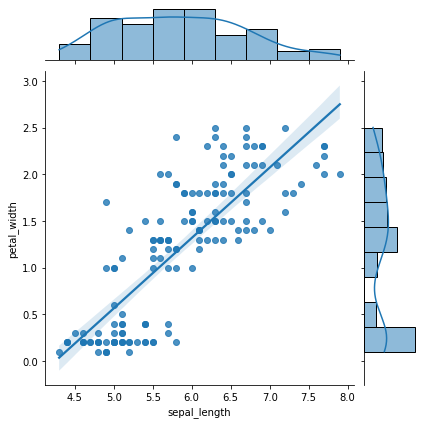

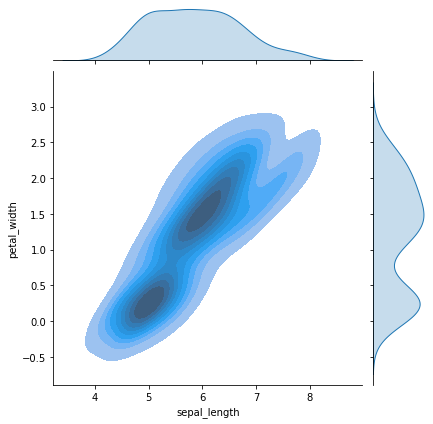

In [10]:
sns.jointplot(x='sepal_length', y='petal_width', data=iris_df, kind='reg') # this one does the regression as well, see below
sns.jointplot(x='sepal_length', y='petal_width', data=iris_df, kind='kde', fill=True)

## Regression line

Given data $(x_1, y_1), (x_2, y_2),... (x_n, y_n)$ line that goes through these points is a regression line.

Its descriptions would be $\hat{y_i} = a + b * x_i$.
* $y_i$ is the observed value
* $\hat{y_i}$ estimate of $y_i$ given by the regression line

One way to find $a$ and $b$ is to use the least square distnace method:

### Method of least squares - regression line

$$
\text{minimize: } \sum_{i=1}^n (y_i - \hat{y_i})^2 = \sum_{i=1}^n (y_i - (a + b * x_i))^2
$$


Somehow it holds that:
$$
b = r * \frac{s_y}{s_x}
\\
a = \bar{y} + b \bar{x}
$$

Predictions of $y$ for given $x$ thus needs - $s_x, s_y, \bar{x}, \bar{y}$

### Regression towards mean

For $x=\bar{x} \implies \hat{y}=\bar{y}$

$$
\hat{y} = a + bx = \bar{y} - b \bar{x} + b \bar{x} = \bar{y}
$$

> Q: If we were to move 1 standard deviation from $\bar{x}$ how would $\hat{y}$ change?

$$
\text{For } x = \bar{x} + s_x
\\
\hat{y} = a + bx = a + r \frac{s_y}{s_x} (\bar{x} + s_x) = a + b \bar{x} + r s_y
$$

> A: If $x$ increases by $s_x$, $\bar{y}$ changes by $r s_y$

And since $s_y \in [-1, 1]$ change in $\hat{y}$ is smaller than change in $x$ scaled to respective standard deviations.
It means that the line is made in a way that given points would be "going" towards mean - e.g. if you've scored the best on the midterm you won't be best on the finals.


<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

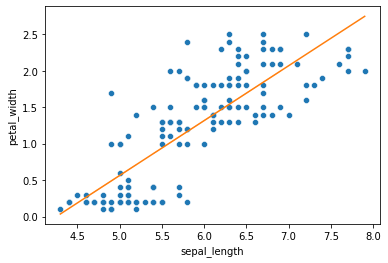

In [11]:
sepal_length = iris_df["sepal_length"]
petal_width = iris_df["petal_width"]
(a, b) = np.polyfit(x=sepal_length, y=petal_width, deg=1)
petal_width_estimate = sepal_length * a + b

sns.scatterplot(x=sepal_length, y=petal_width)
sns.lineplot(x=sepal_length, y=petal_width_estimate, color=palette[1])

## Normal approximation on regression line

Given that a regression line estimates follow normal distribution, it is possible to approximate them using normal approximation in addition to just providing an estimate.

To do normal approximation we need:
* a mean - $\hat{y}$
* and standard deviation - $\sqrt{1 - r^2} * s_y$

This allows to answer questions such as: What percentage of data with x above 40 had y above 61?
1. Compute $\hat{y}(40)$
2. Do normal approximation with $\mu = \hat{y}$ and $\sigma - $\sqrt{1 - r^2} * s_y$
3. That is $zscore = \frac{60 - \mu}{\sigma}$
4. From $zscore$ compute percentages as `scipy.stats.norm.cdf(zscore)` and get percentage that were below 61
5. Do 1 - that and get above 61

In [12]:
1 - stats.norm.cdf(-0.29)

0.6140918811988774

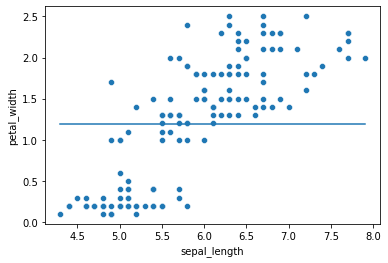

In [13]:
x = sepal_length
y = petal_width
ax = sns.scatterplot(x=x, y=y)
y_hat = np.mean(y)
r = np.corrcoef(x, y)[0,1]
sigma = math.sqrt(1 - (r**2)) * np.std(y)
vals = stats.norm.pdf(x, mu, sigma)
# TODO: this does not really work but it is a worthy attempt
ax.plot(np.linspace(np.min(x), np.max(x), 150), vals + y_hat)

## Residual plots, heteroskedasticity, and transformations

Difference between actual value $y_i$ and predicted value $\hat{y_i}$ is called a residual $e_i$.
$$
e_i = y_i - \hat{y_i}
$$

Ideally residual plot should be spread all over the place - we get a horizontal band that doesn't show any structure.

If residual plot shows some pattern - curvature, line etc. it means that the linear regression is not ideal, it cannot estimate points well.

### Heteroskedasticity

If scatter showes fan-out or fan-in shape it means that the varience changes with x values.

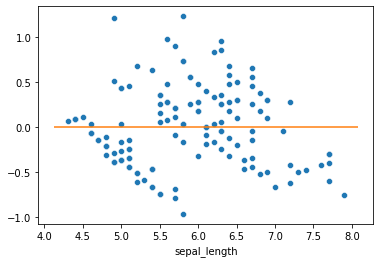

Example of invalid use of regression


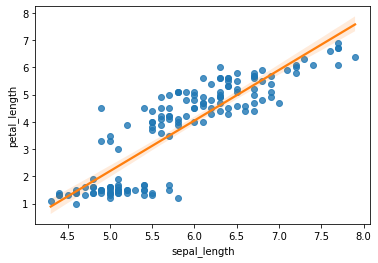

A bit weird looking - downwards facing residual plot


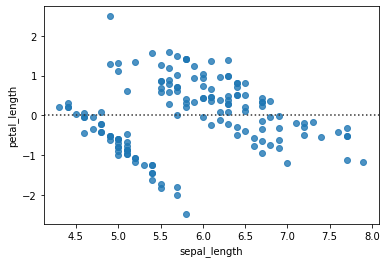

In [14]:
sepal_length
residual = petal_width - petal_width_estimate

ax = sns.scatterplot(x=sepal_length, y=residual)
ax.hlines(y=0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], color=palette[1])
plt.show()

print("Example of invalid use of regression")
sns.regplot(x="sepal_length", y="petal_length", data=iris_df, line_kws={"color": palette[1]})
plt.show()

print("A bit weird looking - downwards facing residual plot")
sns.residplot(x="sepal_length", y="petal_length", data=iris_df)
plt.show()

### Transformations

It may still be possible to analyze such data with linear regression.
The data need to be transformed somehow depending on what curvarute the residual plot shows:
* for $x^2$ curve consider $\sqrt{y}$
* for fan-out / heteroskedastic shape consider $log_a(y)$

In [15]:
# TODO: add example

## Outliers and Influential Points

Residual plot nicely show outliers.

### Leverage

A point which is far from the $\bar{x}$ has high potential to change the slope of the regression line - it has high *leverage*.

### Extrapolation

Avoid estimating $\hat{y}$ for $x \notin [x_{min}, x_{max}]$, even though the trend may be linear in given range it may not be outside of it.

### R-squared

Regression analysis is often presented as $R^2 = r^2$ where $r$ is the correlation coefficient.
It gives the fraction of the variation in the $y$-values that is explained by the regression line.

So $1-r^2$ is the fraction of the $y$-values that is left in the residuals.

# Week 6 - confidence intervals, hypothesis testing

According to CLT, a sample percentage (0/1 labels) follows a normal curve with expected value $E(\mu)$ and $SE = \frac{\sigma}{\sqrt{n}}$ where $n$ is the sample size.

By empirical rule there is 95% chance that the sample percentage is no more than 2 $SE$ away from population percentage $\mu$.
This is equivalent that the population percentage $\mu$ is no more than 2 $SE$ away from sample percentage $\mu$.

### Using the Central Limit Theorem to find a Confidence Interval

$estimate \pm z * SE$

Therefore:
* 95% confidence interval is $E(\mu) \pm 1.96 * SE$ often using 2
* 99% confidence interval is $E(\mu) \pm 2.58 * SE$

> Keep in mind that population $\sigma$ used for $SE$ computation is *unknown*!

It is incorrect to say that there is 95% probability that $\mu$ is within this CI, because population parameter $\mu$ is some unknown constant, it has no probabilistic properties!

Rather, correct interpretation of 95% CI, is that there is 95% change that our random sample encompasses population parameter $\mu$.
The randomness (and probability) is in the random sample not in the population parameter.

### Rule of thumb

When dealing with 95% CI of percentages is $\text{extimated percentage} \pm \frac{1}{\sqrt{n}}$.

That holds because even though we don't know $\sigma$ we know that $\sigma = \sqrt{p (1-p)} \le \frac{1}{2}$ no matter what $p$ is.
$$
\text{estimated percentage} \pm z * SE
\\
z * SE = z * \frac{\sigma}{\sqrt{n}} = 2 * \frac{1}{2\sqrt{n}} = \frac{1}{\sqrt{n}}
$$

For 99.0% confidence interval z=0.24 i.e. sample_estimate+-0.49


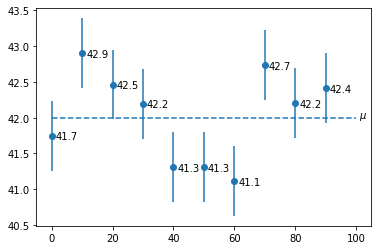

Each vertical line represents a possible sample and its 99.0% confidence interval.
Note that some confidence intervals do not include the population mean mu.


In [16]:
mu = 42
se = 2
xmin, xmax = 0, 100
ci_percentage = 0.99

cis = 10 # number of CIs


z = stats.norm.pdf(ci_percentage)
print(f"For {ci_percentage * 100}% confidence interval z={z:.2f} i.e. sample_estimate+-{(z * se):.2f}")

plt.hlines(mu, xmin, xmax, linestyles="dashed")
plt.annotate("$\mu$", (xmax+1, mu))

np.random.seed(42)
sample_estimates = np.random.uniform(low=mu-0.5*se, high=mu+0.5*se, size=cis)
xs = [i for i in range(xmin, xmax, int((xmax - xmin) / cis))]
plt.vlines(x=xs, ymin=sample_estimates + z*se, ymax=sample_estimates - z*se)
plt.scatter(xs, sample_estimates)
for x, estimate in zip(xs, sample_estimates):
    plt.annotate(f"{estimate:.1f}", xy=(x, estimate), xycoords="data", xytext=(4, -4), textcoords="offset points")
plt.show()

print(f"Each vertical line represents a possible sample and its {ci_percentage * 100}% confidence interval.")
print("Note that some confidence intervals do not include the population mean mu.")

## Hypothesis testing

Is based on rejecting the null hypothesis $H_0$ which assumes that *nothing extraordinary is going on*.

For example your company develops a new product. You are in charge of sales and would like to know if selling the product as a multipack would positively influence product profit. You decide to run an experiment. What is your null hypothesis?

The null hypothesis says that selling the product as a multipack doesn't have any influence on the product profit.

Then you hope to reject the $H_0$.

### Setting up test statistics

A *test statistics* measures how far away the data are from what we would expect if $H_0$ were true.
The most common test statistics is *z-statistics*: $z = \frac{observed - expected}{SE}$ where
* $observed$ is statistics appropriate for testing $H_0$
* $expected$ and $SE$ are computed given $H_0$ is *true*

### p-values

Idea of hypothesis testing is that large values of $|z|$ are evidence against $H_0$ - the larget the $|z|$ the stronger the evidence.

The strength of the evidence is measured by the *p-value*.
If $H_0$ is true, then $z$ follows normal curve according to Central Limit Theorem, so the *p-value* can be computed with normal approximation.

The p-value is the probability of getting result as extreme or more extreme than observed $z$, given $H_0$ is true.
This can be nicely shown in the following plot:

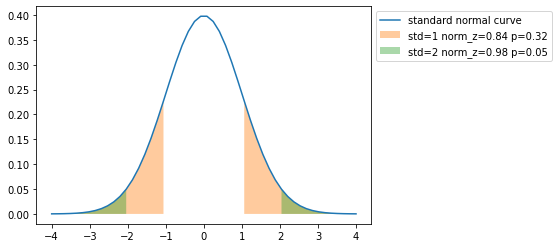

In [17]:
x = np.linspace(-4, 4)
y = stats.norm.pdf(x)
ax = sns.lineplot(x=x, y=y, label=f"standard normal curve")
standard_deviations_away = [1, 2]
for std, color in zip(standard_deviations_away, palette[1:]):
    norm_z = stats.norm.cdf(std)
    p_value = (1 - norm_z) * 2
    ax.fill_between(x, y, where=((x <= -std) & (x >= np.min(x))) | ((x >= std) & (x <= np.max(x))),
                    alpha=0.4, facecolor=color, label=f"std={std} norm_z={norm_z:.2f} p={(p_value):.2f}")
leg = ax.legend(bbox_to_anchor=[1, 1])

## Rejecting hypothesis

Note that p-value *does not give probability* that $H_0$ is true.
Again as with confidence intervals $H_0$ is true or not, there is no probability involved.

Rather p-value gives a probability of seeing a statistics as extreme or more extreme than the observed one assuming $H_0$ is true.

### Example: Distinguish Coke and Pepsi

10 cups filled by either Coke or Pepsi at random.
Students drinks from each and gets 7/10 right - i.e. it is Pepsi / Coke.

$H_0$: Nothing special is going on, student does not have any special abilities to distinguish them i.e. guesses at random.

What are probabilities of getting that right?

$H_0: P(coke) = P(pepsi) = \frac{1}{2}$

$H_A: P(pepsi) > \frac{1}{2}$

This is *one-sided test*: the alternative hypothesis for $P(pepsi)$ we are interested in is on one side of $\frac{1}{2}$

$z = \frac{\text{observed sum} - \text{expected sum}}{\text{SE of sum}} = \frac{\text{correct guesses} - \text{expected guesses}}{n\frac{\sqrt{p-(1-p)}}{\sqrt{n}}} = \frac{7 - 5}{1.58} = 1.27$

Thus $p = 10\%$ and since it is *one-sided test* we don't double it.
Since $p \nleq 5\%$ we *don't reject $H_0$ - we are not convinced that student can distinguish Coke and Pepsi.

In [18]:
n = 10
p = 0.5
correct_guesses = 7
expected_guesses = 5

sigma = p # sqrt(p**2) from binomial
se = p / math.sqrt(n)
se_of_sum = n * se

z = (correct_guesses - expected_guesses) / se_of_sum
print(f"z = {z:.2f}")

p = 1 - stats.norm.cdf(z) # since it is one-sided we don't double
print(f"p = {p:.2f}")

z = 1.26
p = 0.10


A two sided test might also be viable here.
It would correspond to a student who can distinguish Coke and Pepsi but doesn't know which is which.
In that case the correct guesses would be really low e.g. 1 or 2.

$H_A: P(pepsi) \ne \frac{1}{2}$

One has to carefully consider when to use one-sided or two-sided test because it the latter case one needs to double the p-value.

## Student's t-distribution

For smaller sample sizes $n$ normal approximation does not work well.
A Student's t-distribution characterizes samples with $n \le 20$ better and thus we can use that.

Student's t-distribution has one parameter - *degree of freedom* or $df$ and this is set to $df = n-1$ for these smaller samples.

Below code showes that with big $df$ the pdf is close to normal curve with smaller $df$ it has lower maxima but is bigger tails.

<AxesSubplot:xlabel='x', ylabel='norm'>

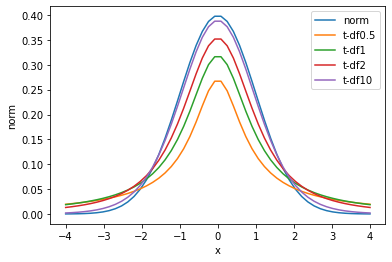

In [19]:
x = np.linspace(-4, 4)
df = pd.DataFrame({
    "x": x,
    "norm": stats.norm.pdf(x),
    "t-df0.5": stats.t.pdf(x, df=0.5),
    "t-df1": stats.t.pdf(x, df=1),
    "t-df2": stats.t.pdf(x, df=2),
    "t-df10": stats.t.pdf(x, df=10),
})

sns.lineplot(x="x", y="norm", label="norm", data=df)
sns.lineplot(x="x", y="t-df0.5", label="t-df0.5", data=df)
sns.lineplot(x="x", y="t-df1",   label="t-df1", data=df)
sns.lineplot(x="x", y="t-df2",   label="t-df2", data=df)
sns.lineplot(x="x", y="t-df10",   label="t-df10", data=df)

## t-test

Therefore for smaller sample sizes $n \le 20$ we use Student's t-distrubution approximation.
For such approximation we need:
* $\mu$ and that stays the same - sample average, and
* $SE = \frac{\sigma}{\sqrt{n}}$, where using bootstrap principle $\sigma = s$ where $s$ is standard deviation of the sample.
* for Student's t-test with $n-1$ degrees of freedom - $s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n}{(x_i - \bar{x})^2}}$

The fatter tail accounts for additional uncertainty introduced by estimating $\sigma$.

In this case since we are not using standard approximation, $zscores$ are not good for Confidence Intervals and we should rather use *t-statistics*: $\bar{x} \pm t_{n-1} SE$

## Statistical significance vs. Importance

Statistical test may be significant but that does not mean it is of real world importance.
For example if a number of lead particles is 15 ppb (parts per bilion) and our (rather large) sample of size has 15.05 ppb lead particles in water depending on the $n$ the statistical test may say the change is significantly above health limit 15ppb.
However, that does not mean it is health hazard, the test statistics just says that there is a difference, it does not say it is important.

This is because of law of large numbers, with large $n$, standard error $SE = \frac{\sigma}{\sqrt{n}}$ may be small and thus the z-statistics will evaluate to large confidence that the concentration is higher.
That does not say what is the magnitude of difference.
For that reason we should acompany statistical test with a confidence interval e.g. 95% $[\bar{X} - 2SE, \bar{X} + 2SE]$

## Statistical errors

A 95% confidence interval contains all values for the null hypothesis that will not be rejected by two-sided test at 5% significance level.
A 5% significance level means that the threshold for the p-value is 5%.

There are two ways that the test can result in wrong decision:
* $H_0$ is true, but was errornously rejected -> Type 1 error ("false positive")
* $H_0$ is false, but we fail to reject it -> Type 2 error ("false negative")

Rejecting $H_0$ if the p-value is smaller than 5% means $P(\text{type 1 error}) \le 5\%$

## The Two-Sample z-test

Last month the presidents approval ratings in sample of 1000 was 55%.
This month in sample of 1500 was 58%.
Is this sufficient evidence to conclude ratings have changed?

* $p_1$ = proportion of likely voters approving last month
* $p_2$ = proportion of likely voters approving this month

$H_0$: (nothing unusual) $p_1 = p_2$ or instead $p_1 - p_2 = 0$

$H_1$: $p_1 - p_2 \ne 0$

We have estimates $\hat{p_1}$ and $\hat{p_2}$ for $p_1$ resp. $p_2$.

$z = \frac{(\hat{p_1} - \hat{p_2}) - (p_1 - p_2)}{\text{SE of difference}}$

$SE(\hat{p_1} - \hat{p_2}) = \sqrt{SE(\hat{p_1})^2 + SE(\hat{p_2})^2}$

$SE(\hat{p_1}) = \sqrt{\frac{p - (1-p)}{n}}$

*Pooling technique* - combine two samples (sum sample size and number of approvals) and do z-statistics on that with combined $\sigma$ estimates equal to standard deviation of the pooled sample. This is dangerous if the individual samples deviations are not similar.


## The paired-difference test

Given two samples that are not independent we cannot use two sample z-test.
For example: husband tends to be older than his wife.
We have sample of ages of husbands and their wives and respective differences, however we cannot use two-sample z test because they are not independent, ranges of pairs (e.g. young couples vs. old couples) may vary...

To solve this there are pair tests:

$H_0$: difference in population means is zero.

We can use t-test (if the population is small) and compute p-value of the difference.

## The sign test

If we didn't have the exact values of the samples - the age differences but only the fact if the husband is or isn't older (boolean values) we might use, so called, sign-test.

We can test if:

$H_0$: half the husbands in the population are older than their wives.

Using 0/1 labels and z-test, just as we tested whether the coin is fair.







# Week 6 - Computer Simulations, Bootstrap and MonteCarlo methods

Confidence interval via normal approximation is $\hat{x} = z * SE(\hat{x})$.

However, what if we are interested in an estimator $\hat{\theta}$ for some parameter $\theta$ that does not follow normal curve and thus normal approximation is not valid.
What if there is no formula for $SE(\hat{\theta})$?

In such situations we can often estimate these quantities well with simulations.
In fact simulations may give us better results even in cases where normal approximation is aplicable.

## Monte Carlo simulation

Q: What is the average hight of all people living in the US?

* $\theta$ - parameter of the population - mean of height
* $\hat{\theta}$ - statistics of the population (estimator) - mean of the random sample of size $n$

Because of law of large numbers $\hat{\theta}$ tends to be close to the uncomputable population mean $\theta$ even for moderate sample sizes such as $n = 100$.

*Monte Carlo Method*: describes how to get sample for a simulation that estimates population parameter $\theta$
1. We aproximate fixed quantity $\theta$ by average of independent random variables that have expected value $\theta$.
2. By Law of Large numbers, the approximation error can be made arbitrarily small by using large enough sample size.

Q: What is the $SE$ of statistics $\hat{\theta}$?

Generic formula for $SE$:

$SE(\hat{\theta}) = \sqrt{E(\theta - E(\hat{\theta}))^2}$

Get many (say 1000) samples of 100 observations each.

Compute $\hat{\theta}$ for each sample resulting in 1000 estimates $\hat{{\theta}_1}, ..., \hat{{\theta}}_{1000}$.

Compute standard deviation of these 1000 samples:

$s(\hat{{\theta}_1}, ..., \hat{{\theta}}_{1000}) = \sqrt{\frac{1}{999} \sum_{i=1}^{1000}(\hat{\theta}_i - avg(\hat{\theta}_i))}$

$avg(\hat{\theta}_i)$ is not average of random independent variables but Monte Carlo method works.

This method will only work if I can get multiple samples of at least 100.
In other words simulation works if I can sample as much as I wish.

## Bootstrap simulation

The bootstrap pretends that the sample histogram is the population histogram and then uses Monte Carlo to simulate the quantity of interest.

Simulating a bootstrap sample $X_1^*,..., X_n^*$ means that we *draw $n$ times with replacement* from sample $X_1,..., X_n$

The boostrap consists of two steps:
1. Draw $B$ bootstrap samples and compute $\hat{\theta}^*$ for each bootstrap sample:

    $X_1^{*1},..., X_n^{*1} \rightarrow \hat{\theta}_1^*$  

    $X_1^{*B},..., X_n^{*B} \rightarrow \hat{\theta}_B^*$  

2. Use $\hat{\theta}_1^*, ..., \hat{\theta}_B^*$ to approximate the quantity of interest.
   For example, we approximate $SE(\hat{\theta})$ by the standard deviation of $\hat{\theta}_1^*, ..., \hat{\theta}_B^*$.

**Bootstrap uses two approximations:**
1. replaces population histogram by sample histogram
2. approximates the quantity using law of large numbers


### (Non)-parametric bootstrap

Non-parametric bootstrap simulates a bootstrap sample by drawing random sample with replacement from the sample.

Sometimes a parametric model is appropriate for the data, e.g. a normal distribution with unknown $\mu$ and $\sigma$.
Then one may be better of with *parametric bootstrap*, which simulates the bootstrap sample from this model, using $\hat{\mu}$ and $\hat{\sigma}$.
This sampling works if the samples are drawn independently.

If there is dependence in the data (e.g. on time) then it needs to be incorporated e.g. *block bootstrap*.

### Bootstrap confidence intervals

If the sampling distribution of $\hat{\theta}$ is approximately normal, then 

$\hat{\theta} \pm z_{\alpha / 2}SE(\hat{\theta})$

is an approximate $(1 - \alpha)$-confidence interval for $\theta$.

If $\hat{\theta}$ is not approximately normal, we can use bootstrap to estimate the whole sampling distribution of $\hat{\theta}$, not just $SE(\hat{\theta})$
The sampling distribution of $\hat{\theta}$ can be approximated by that of $\hat{\theta}^*$ which in turn can be approximated by the histogram of $\hat{\theta}_1^*, ..., \hat{\theta}_B^*$.

This gives the *bootstrap percentile interval* $[\hat{\theta}_{\alpha / 2}^*, \hat{\theta}_{1 - \alpha / 2}^{*}]$ where $\hat{\theta}_{\alpha / 2}^*$ is the $\alpha / 2$ percentile of $\hat{\theta}_1^*, ..., \hat{\theta}_B^*$.

### Bootstrap the distribution of $\hat{\theta} - \theta$

This is an alternative.
The hope is that this approach is less sensitive to $\theta$ and therefore produces a more accurate confidence interval.

This result is the *bootstrap pivot interval*

$[2\hat{\theta} - \hat{\theta}_{1-\alpha/2}^*, 2\hat{\theta} - \hat{\theta}_{\alpha/2}^*]$

### Bootstrapping for regression

We have data $(X_1, Y_1), ..., (X_n, Y_n)$ from the simple linear regression model $Y_i = a + b X_i + e_i$.

From the data we can compute estimates $\hat{a}$ and $\hat{b}$.
How can we use the bootstrap to get standard errors and confidence intervals?
We cannot bootstrap pairs of data, but we can bootstrap residuals of the regression line.

* compute the residuals $\hat{e_i}= Y_i - \hat{a} - \hat{b} X_i$
* resample from residuals to get $e_1^*, ..., e_n^*$
* compute the bootstrapped responses $Y_i^* = \hat{a} + \hat{b} X_i + e_i^*$

That generate the new state of observations $(X_1, Y_1^*), ..., (X_n, Y_n^*)$, from which we can estimate the parameters $\hat{a}^*$ and $\hat{b}^*$ in the usual regression way.
Then follow usual bootstrap algorithm, repeate this 1000 times and then compute $SE(\hat{a}^*)$ and $SE(\hat{b}^*)$.


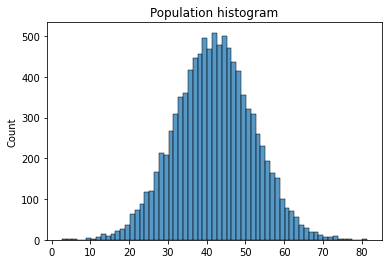

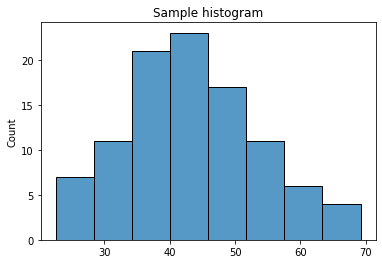

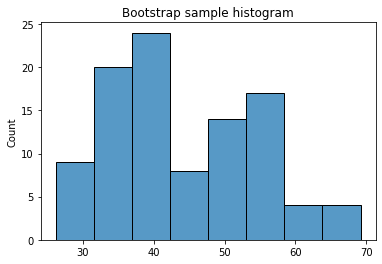

In [20]:
mu = 42
sigma = 10
population = np.random.normal(mu, sigma, size=10000)
#population = np.random.binomial(n=100, p=0.1, size=10000)
ax = sns.histplot(population)
ax.set_title("Population histogram")
plt.show()


sample = np.random.choice(population, size=100, replace=False)
ax = sns.histplot(sample)
ax.set_title("Sample histogram")
plt.show()

bootstrap_sample = np.random.choice(sample, size=100, replace=True)
ax = sns.histplot(bootstrap_sample)
ax.set_title("Bootstrap sample histogram")
plt.show()


#mu_hat = np.mean(sample)
#sigma_hat = np.std(sample)
#p = np.(mu_hat, sigma_hat)
#TODO: parametrized_bootstrap_sample = np.random.choice(sample, size=100, replace=True, p=)
#ax = sns.histplot(parametrized_bootstrap_sample)
#ax.set_title("Parametrized Bootstrap sample histogram")
#plt.show()


## Chi-square test for categorical data

### Chi-square goodness of fit test

M&M sweets used to publish proportion of sweet colors on their website.

Q: test whether this proportion is still accurate.

For that you get as much M&M as you want and count individual colors.
Based on published percentages (distribution) you can get observed and expected numbers.

$H_0$: nothing has changed, the last published proportion still holds.

Chi-square test works as follows:

$\chi^2 = \sum_{\text{all categories}}{\frac{(observed - expected)^2}{expected}}$

Notice that we normalize by the expected value.
\text{are is a probabilistic distribution with a parameter - degrees of freedom $df$.
From it we can compute p-value and base our confidence on that.

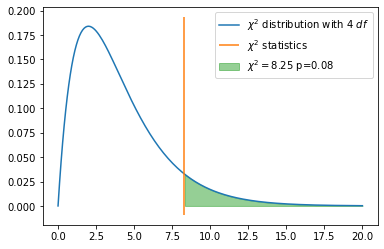

In [60]:
x = np.linspace(0, 20, num=200)
categories = 5
df = categories - 1
y = stats.chi2.pdf(x, df)
ax = sns.lineplot(x=x, y=y, label=f"$\chi^2$ distribution with {df} $df$")

chi2 = 8.25
ymin, ymax = ax.get_ylim()
ax.vlines([chi2], ymin, ymax, label="$\chi^2$ statistics", color=palette[1])

p_value = 1 - stats.chi2.cdf(chi2, categories - 1)
ax.fill_between(x, y, where=(x >= chi2) & (x <= np.max(x)), alpha=0.5, color=palette[2], label=f"$\chi^2={chi2}$ p={(p_value):.2f}")
plt.legend()

### Chi square test for homegeneity

Q: Did the titanic passengers have the same probability of survival across different ticket classes?

*The $\chi^2$-test of homegeneity* tests the null hypothesis $H_0$: that the distribution of categorical variable is the same for several populations.

We are not sampling from the population, data represents the whole population.
The change process is a result of random events that can lead to some probability histogram.

We pool the table together to calculate expected values, then compute chi-squared of observed vs. expected on all contingency table cells.

$\chi^2 = \sum_{\text{all cells}}{\frac{\text{observerd} - \text{expected}}{\text{expected}}}$

The degress of freedom is different to chi-square goodness of fit test $df = (\text{no. of columns} - 1) * (\text{no. of rows} - 1).
And get p-value from the chi2 distrubution with $df$.


### Chi square test for independence

Q: Is gender (male/female) related to voting preference (liberal/conservative)?

Now we have two categorical variables: gender and voting preference.

$H_0$: Two variables are independent.
$H_1$: There is some kind of association.

After sampling from population the counts are recorded in $2 \times 2$ table.
The $\chi^2$-statistics and p-value are computed exactly the same as in case of testing homegeneity, thus it is easy to mix these two up.

|                               | Sample                                                  | Research question                                                                    |
| ----------------------------- | ------------------------------------------------------- | ------------------------------------------------------------------------------------ |
| $\chi^2$ test of homegeneity  | single categorical variable measured on several samples | Are the groups homegeneous (have the same distribution of the categorical variable)? |
| $\chi^2$ test of independence | two categorical variables measured on one sample        | Are the two categorical variables independent?                                       |


# Week 7 - Analysis of Varience F-test

Given three groups of data and their samples, we can see their box plots and different means.

Is it sufficient evidence that there is difference between them?

For two samples only we could use the two sample t-test:

$ t = \frac{\text{difference in sample means}}{\text{SE of difference}}$

For several groups there is a methodology - ANOVA

## ANOVA - Analysis of Varience

Consider differences in the mean of the following distributions:

We have $k$ groups and the $j$-th group has $n_j$ observations:

|           |                        |
| --------- | ---------------------- |
| group 1   | $y_{11} .. y_{{n_1}1}$ |
| group 2   | $y_{12} .. y_{{n_2}2}$ |
| ...       | ...                    |
| group $k$ | $y_{1k} .. y_{{n_k}k}$ |

Total $N = \sum_{i=1}^k {n_i}$

Sample mean of $j$-th group is $\bar{y_j} = \frac{1}{n_j} \sum_{i=1}^{n_j} {y_{ij}}$

Overall sample mean is $\bar{\bar{y}} = \frac{1}{N} \sum_{j=1}^{k} {\sum_{i=1}^{n_j} {y_{ij}}}$

For example: Examine three approaches to learning - homework only, homework + grading, study only and compare them on finals results.

Approach to learning is called a *treatment*

The *treatment sum of squares* $SST = \sum_j {\sum_i {(\bar{y_j} - \bar{\bar{y}})^2}}$
has $k-1$ degress of freedom.

The *treatment mean square* $MST = \frac{SST}{k-1}$ measures the variability of the treatment means $\bar{j_j}$.

The *error sum of squares* $SSE = \sum_j {\sum_i {(y_{ij} - \bar{y_j})^2}}$ has $N-k$ degrees of freedom.

The *error mean square* $MSE = \frac{SSE}{N - k}$ measures the variability within the groups.

**F-statistic**

Since we want to compare variation between the groups to the variation within the groups we look at the ratio $ F = \frac{MST}{MSE}$.

Under the null hypothesis of equal group means this ratio should be about $1$. It will not be exactly $1$ due to sampling variability.

It follows a *F-distribution* with $k-1$ and $N-k$ degress of freedom.

Large F suggesta that the variation between the groups is unusually large.
We reject $H_0$ if $F$ is in the right $5\%$ tail, i.e. when the p-value is smaller than $5\%$.

**ANOVA table**

| Source    | df    | Sum of squares | Mean square | $F$       | p-value |
| --------- | ----- | -------------- | ----------- | --------- | ------- |
| Treatment | $k-1$ | $SST$          | $MST$       | $MST/MSE$ |         |
| Error     | $N-k$ | $SSE$          | $MSE$       |           |         |
| Total     | $N-1$ | $TSS$          |             |           |         |


*One way ANOVA* behind the table is $y_ij= \mu_j + \epsilon_{ij}$ where $\mu_j$ is the mean of the $j$-th group and the $\epsilon_{ij}$ are independent random variables (e.g. measurement error) that follow the normal curve with mean $0$ and common variance $\sigma^2$.

$H_0: \mu_1 = \mu_2 = ... =\mu_k$

Instead of looking at the treatment means $\mu_j$ it is helpful to look at the deviation $\tau_j$ from the overall mean $\mu: \tau_j = \mu_j - \mu$.

So the model is $y_{ij} = \mu + \tau_j + \epsilon_{ij}$ where $\tau_j$ is called *the treatment effect* of group $j$.

$H_0: \tau_1 = \tau_2 = ... =\tau_k$

We estimate the overall mean $\mu$ by the 'grand mean' $\bar{\bar{y}}$.

The estimate of $\tau_j = \mu_j - \mu = \bar{y_j} - \bar{\bar{y}}$

The estimate of $\epsilon_j$ is residual $y_{ij} - \bar{y_j}$.

Corresponding to the model $y_{ij} = \mu + \tau_j + \epsilon_{ij}$ we can write $y_{ij} as the sum o the corresponding estimates:

$y_{ij} = \bar{\bar{y}} + (\bar{y_j} - \bar{\bar{y}}) + (y_{ij} - \bar{y{j}})$

It turns out that such a decomposition is also true for the sum of squares:

$$
\sum_j {\sum_i {(y_{ij} - \bar{\bar{y}})^2}} =  \sum_j {\sum_i {(\bar{y_j} - \bar{\bar{y}})^2}} + \sum_j {\sum_i {(y_{ij} - \bar{\bar{y}})^2}}
\\
TSS = SST + SSE
$$

This means that $TSS$ is split between two sources: $SST$ and $SSE$.

**Restrictions:**
* F-test assumes that all the groups are normally distributed and have varience $\sigma^2$.
* Data are independent, within and across groups
  * for randomized controlled experiment this is viable
  * on the other hand if data was from observational study this may be a problem
* If the F-test rejects ,then we can conclude that the group means are not all equal, but how do they differ?
* We can examine all pairs of means with a two sample t-test using $s_{pooled} = \sqrt{MSE}$, but since that involves several tests, an adjustment such as Bonferonni adjustment is necessary, see next module.

Text(0.5, 1.0, 'Variance difference in multiple categories\ny1, y2 and y3 have hard to distinguish varience,\ny4 and y5 are obviously away.')

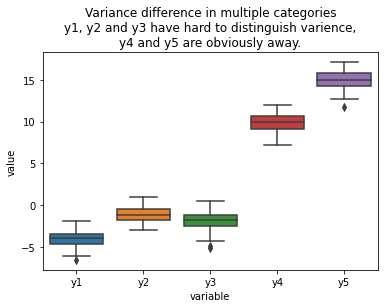

In [26]:
n = 100
df = pd.DataFrame({
    "y1": np.random.normal(-4, 1, size=n),
    "y2": np.random.normal(-1, 1, size=n),
    "y3": np.random.normal(-2, 1, size=n),
    "y4": np.random.normal(10, 1, size=n),
    "y5": np.random.normal(15, 1, size=n),
}, index=range(n))

df = pd.melt(df)

ax = sns.boxplot(x="variable", y="value", data=df)
ax.set_title("Variance difference in multiple categories\ny1, y2 and y3 have hard to distinguish varience,\ny4 and y5 are obviously away.")

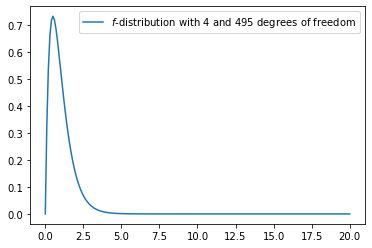

In [28]:
x = np.linspace(0, 20, num=200)
k = 5
N = n * k
y = stats.f.pdf(x, k-1, N-k)
ax = sns.lineplot(x=x, y=y, label=f"$f$-distribution with {k-1} and {N-k} degrees of freedom")

# Week 8

## Multiple testing fallacy

A statistical test summarizes the evicdence for an effect by reporting a p-value: a smaller p-value means stronger evidence.

$pvalue < 1\% \rightarrow$ test is 'highly significant'

Interpretation: If there is no effect, then there is only 1% change to get such a highly significant result.

Therefore, if you were to do 800 tests, then even if there is no effect at all we expect to see 8 highly significant results just by chance!


### Reproducibility and Replicability

Multiple testing fallacy is connected to finding data sample that produces significant result - *data snooping*.

Data snooping and other probelms have lead to a crisis with regard to replicatbility and reproducibility.

Papers:
* 'How sciece goes wrong' in the Exonomist (13 Oct 2013)
* 'Why most published research findigs are false' by J. Ionnidis (2005)


## Accounting for multiple comparisons

### Bonferroni correction

*Bonferonni correction*: If there are *m* tests, multiply the p-values by $m$.

The Bonferrony correction makes sure that $P(\text{any of the }m \text{ tests rejects in error} \le 5\%)$

This obviously does not scale well with the large number of tests.

Q: 1,000 tests were evaluated with the Bonferroni correction. 31 tests had corrected p-values smaller than 5%.  Which of the following three statements is an  appropriate conclusion?

1. There is a 95% probability that all of these 31 null hypotheses are false.
2. If we reject these 31 null hypotheses then we can expect that about 5% of them are rejected in error.
3. This is sufficient evidence to reject all of these 31 null hypotheses, because there is only a 5% chance that any of these 31 p-values would be this small if the null hypotheses were true.

A: 3
The Bonferroni correction ensures that if all the null hypotheses are true, the probability that the 1000 tests will lead to a discovery is less than 5%, and we consider true any discovery that arises from these tests.
That is, we reject any null hypothesis associated with a corrected p-value of 5% (i.e., an uncorrected p-value of 0.005%).

### False discovery rate

Alternatively we can try to control the *False Discovery Proportion (FDP)*

$FDP = \frac{\text{number of false discoveries}}{\text{total number of dicoveries}}$

where a 'discovery' occurs when a test rejects the null hypothesis.

Test may reject the null hypothesis in 3 ways:
* correctly - true $H_1$ holds
* type1 error - false positive
* type2 error - false negative

Even with multiple samples an tests false discovery rate procedure by Benjamini-Hochberg to control the FDR at level $\alpha=5\%$:
1. Sort the p-values: $p_{(1)} \le ... \le p_{(m)}$
2. Find the largest $k$ such that $p_{(k)} \le \frac{k}{m} \alpha$
3. Declare discoveries for all tests $i$ from $1$ to $k$.

Q: 1,000 tests were evaluated with the FDR at the 5% level, which resulted in 31 discoveries.  Which of the following three statements is an  appropriate conclusion?

1. There is a 95% probability that all of these 31 null hypotheses are false.
2. This is sufficient evidence to reject all of these 31 null hypotheses, because there is only a 5% chance that any of these 31 pp-values would be this small if the null hypothesis were true.
3. If we reject these 31 null hypotheses then we can expect that about 5% of them are rejected in error.

A: 3
The FDR is designed to constrain the FDP (the proportion of discoveries that are false discoveries) to be at most $\alpha\%$, so in this case we can expect that about 5% of the discoveries we find using FDR to be false.
That is, we can expect that 5% of the null hypotheses that FDR leads us to reject are rejected in error.

### Validation set approach

Split the data before the analysis into:
* model-building set
* validation set

You may use data snooping on the model-building set to find something interesting.
The test the hypothesis on the validation set.
These two must not mix under any circumstances.